Prerequisite

In [1]:

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

Necessary Codes

In [2]:
### Code for rotating the graph

def rotate_layout(pos, angle):
    """Rotate the layout by a given angle in degrees."""
    angle_rad = np.radians(angle)  # Convert angle to radians
    rotation_matrix = np.array([
        [np.cos(angle_rad), -np.sin(angle_rad)],
        [np.sin(angle_rad), np.cos(angle_rad)]
    ])
    rotated_pos = {
        node: np.dot(rotation_matrix, np.array(coords))
        for node, coords in pos.items()
    }
    return rotated_pos

Bill of materials for Jensen Variant

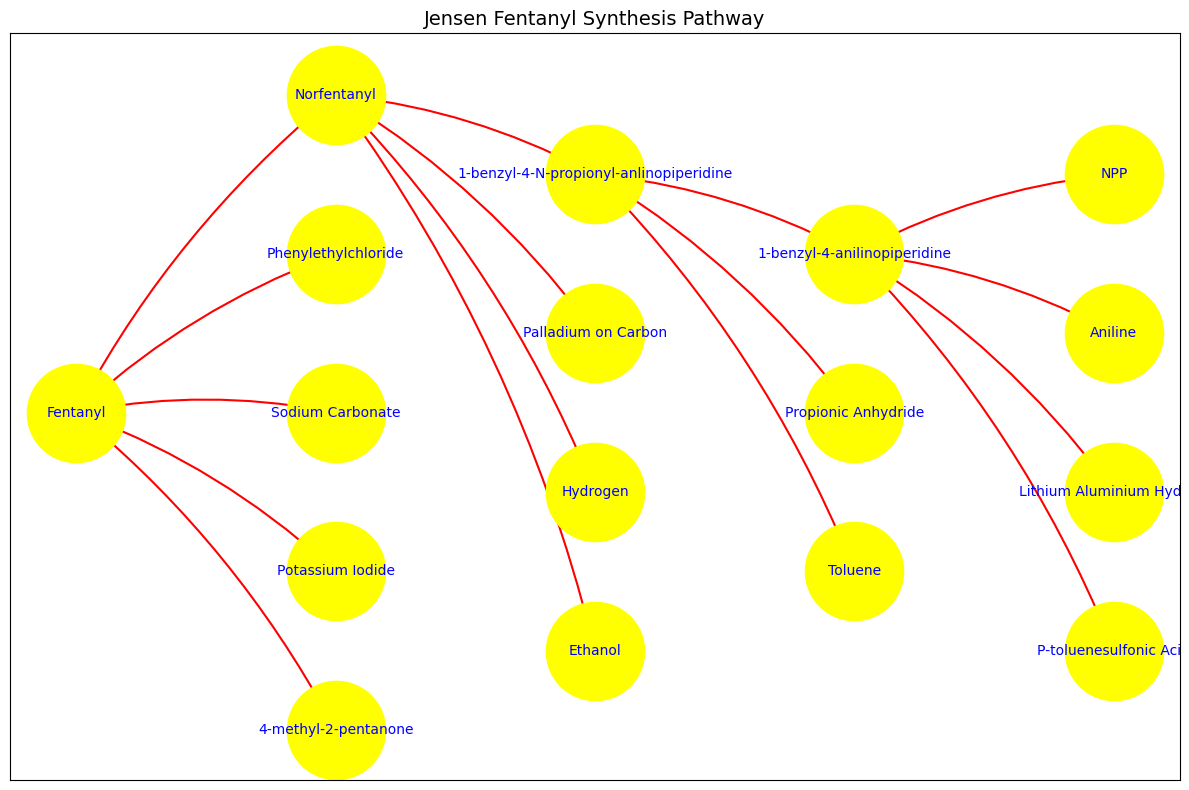

In [3]:

# Use MultiDiGraph to allow multiple edges between nodes
jensen_fentanyl = nx.MultiDiGraph()

# Define nodes by synthesis steps (with assigned layers)
jensen_fentanyl_nodes_1 = ['NPP', 'Aniline', 'Lithium Aluminium Hydride', 'P-toluenesulfonic Acid']
jensen_fentanyl_nodes_2 = ['Propionic Anhydride', '1-benzyl-4-anilinopiperidine','Toluene']
jensen_fentanyl_nodes_3 = ['Palladium on Carbon', 'Hydrogen','Ethanol', '1-benzyl-4-N-propionyl-anlinopiperidine']
jensen_fentanyl_nodes_4 = ['Phenylethylchloride','Sodium Carbonate','Potassium Iodide','4-methyl-2-pentanone', 'Norfentanyl']

# Final product
jensen_fentanyl.add_node('Fentanyl', layer=1)

# Add nodes and edges by layer
for i in jensen_fentanyl_nodes_1:
    jensen_fentanyl.add_node(i, layer=5)
    jensen_fentanyl.add_edge(i, '1-benzyl-4-anilinopiperidine', key='jensen', label='jensen')

for i in jensen_fentanyl_nodes_2:
    jensen_fentanyl.add_node(i, layer=4)
    jensen_fentanyl.add_edge(i, '1-benzyl-4-N-propionyl-anlinopiperidine', key='jensen', label='jensen')

for i in jensen_fentanyl_nodes_3:
    jensen_fentanyl.add_node(i, layer=3)
    jensen_fentanyl.add_edge(i, 'Norfentanyl', key='jensen', label='jensen')

for i in jensen_fentanyl_nodes_4:
    jensen_fentanyl.add_node(i, layer=2)
    jensen_fentanyl.add_edge(i, 'Fentanyl', key='jensen', label='jensen')

# Draw the graph
plt.figure(figsize=(12, 8))

# Generate multipartite layout
pos = nx.multipartite_layout(jensen_fentanyl, subset_key="layer", scale=1)

# Optional: rotate layout (if `rotate_layout` is your custom function)
# If not defined, remove or use built-in transform
pos = rotate_layout(pos, -90)
# If rotate_layout isn't defined, here's an equivalent manual flip:
pos = {node: (-y, x) for node, (x, y) in pos.items()}

# Draw nodes and labels
nx.draw_networkx_nodes(jensen_fentanyl, pos, node_color="yellow", node_size=5000)
nx.draw_networkx_labels(jensen_fentanyl, pos, font_size=10, font_color="blue")

# Draw edges
for u, v, k, data in jensen_fentanyl.edges(data=True, keys=True):
    nx.draw_networkx_edges(
        jensen_fentanyl,
        pos,
        edgelist=[(u, v)],
        edge_color='red',
        arrows=True,
        width=1.5,
        connectionstyle='arc3,rad=0.1'  # Use curvature for visual clarity if needed
    )

# Add plot title
plt.title("Jensen Fentanyl Synthesis Pathway", fontsize=14)
plt.tight_layout()
plt.savefig('Jensen_BOM.png', dpi=1200)
plt.show()




Bill of material representation for Zee variant

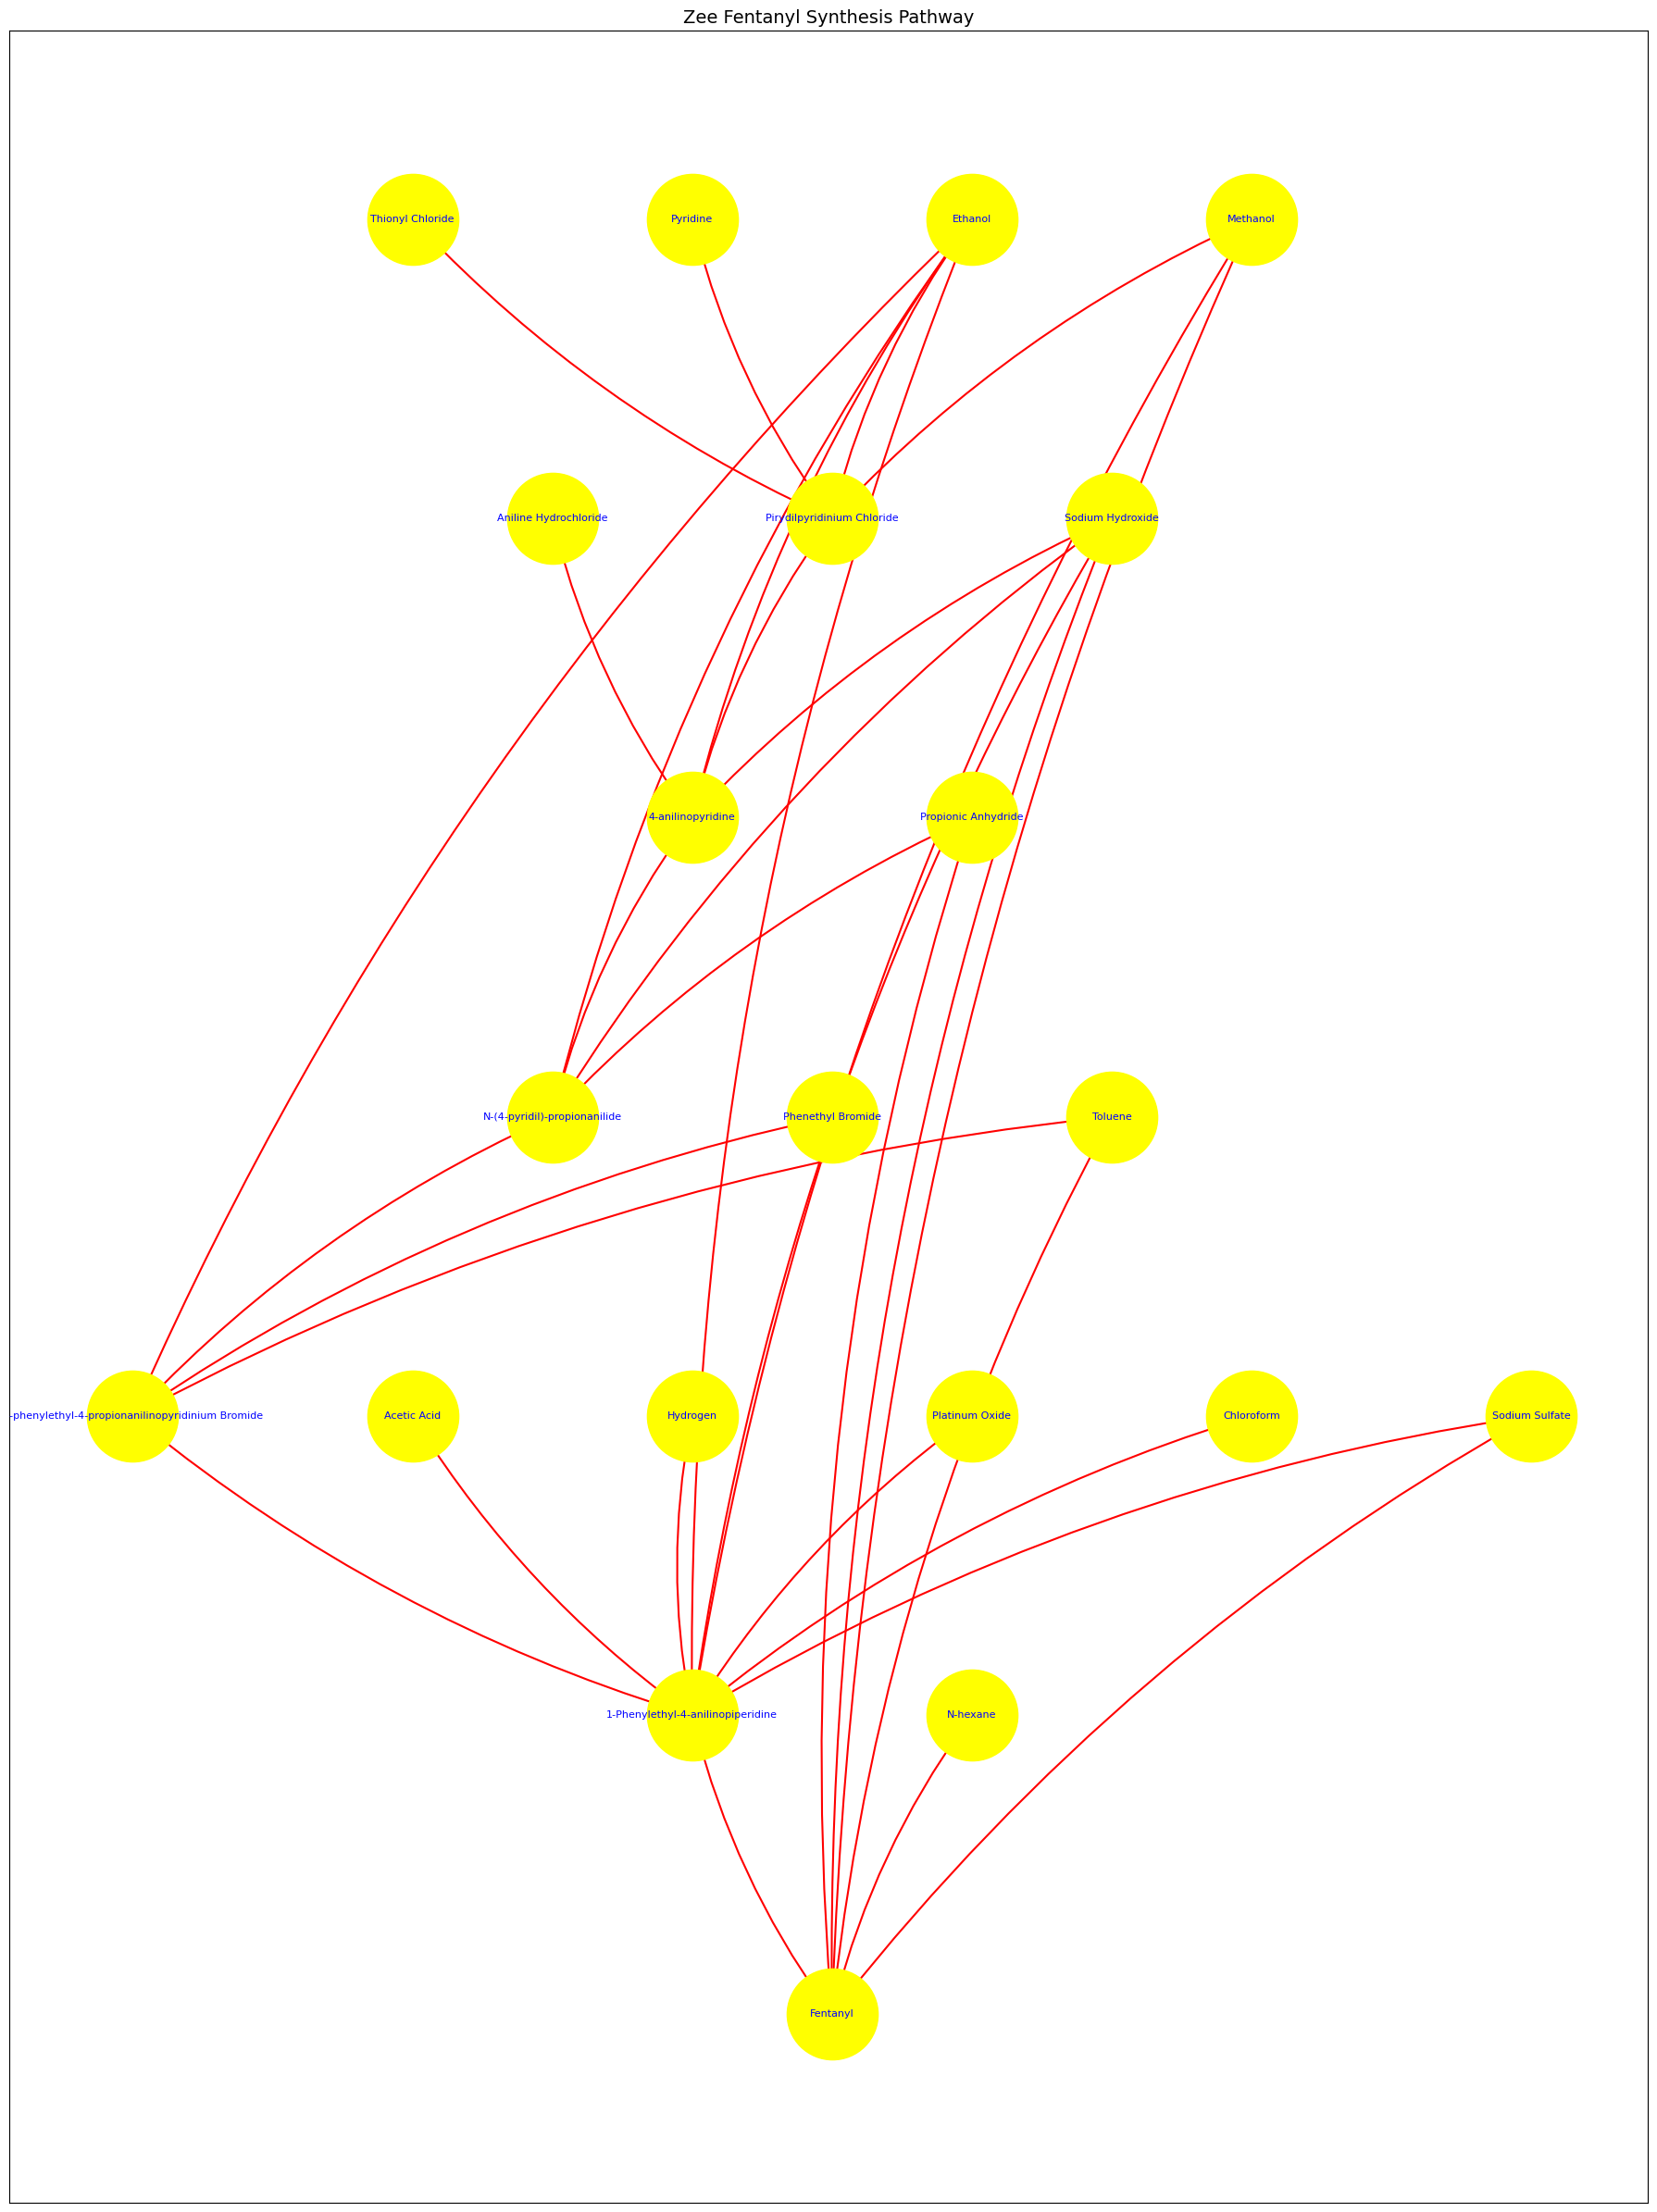

In [4]:
# Step 1: Convert graph to MultiDiGraph to support parallel edges
zee_fentanyl = nx.MultiDiGraph()

# Step 2: Define synthesis steps with layers
zee_fentanyl_nodes_1=['Pyridine','Thionyl Chloride','Ethanol','Methanol']
zee_fentanyl_nodes_2=['Pirydilpyridinium Chloride','Aniline Hydrochloride','Sodium Hydroxide','Ethanol']
zee_fentanyl_nodes_3=['Propionic Anhydride','4-anilinopyridine','Sodium Hydroxide','Ethanol']
zee_fentanyl_nodes_4=['Ethanol','Phenethyl Bromide','Toluene','N-(4-pyridil)-propionanilide']
zee_fentanyl_nodes_5=['Sodium Hydroxide','Chloroform','Sodium Sulfate','Methanol','Platinum Oxide','Hydrogen','Acetic Acid','Ethanol','1-phenylethyl-4-propionanilinopyridinium Bromide']
zee_fentanyl_nodes_6=['Toluene','Propionic Anhydride','Sodium Hydroxide','Sodium Sulfate','Methanol', 'N-hexane','1-Phenylethyl-4-anilinopiperidine']
# Step 3: Final product node
zee_fentanyl.add_node('Fentanyl', layer=1)

# Step 4: Add nodes and edges by layer
for i in zee_fentanyl_nodes_6:
    zee_fentanyl.add_node(i, layer=2)
    zee_fentanyl.add_edge(i, 'Fentanyl', key='zee', label='zee')

for i in zee_fentanyl_nodes_5:
    zee_fentanyl.add_node(i, layer=3)
    zee_fentanyl.add_edge(i, '1-Phenylethyl-4-anilinopiperidine', key='zee', label='zee')

for i in zee_fentanyl_nodes_4:
    zee_fentanyl.add_node(i, layer=4)
    zee_fentanyl.add_edge(i, '1-phenylethyl-4-propionanilinopyridinium Bromide', key='zee', label='zee')

for i in zee_fentanyl_nodes_3:
    zee_fentanyl.add_node(i, layer=5)
    zee_fentanyl.add_edge(i, 'N-(4-pyridil)-propionanilide', key='zee', label='zee')

for i in zee_fentanyl_nodes_2:
    zee_fentanyl.add_node(i, layer=6)
    zee_fentanyl.add_edge(i, '4-anilinopyridine', key='zee', label='zee')

for i in zee_fentanyl_nodes_1:
    zee_fentanyl.add_node(i, layer=7)
    zee_fentanyl.add_edge(i, 'Pirydilpyridinium Chloride', key='zee', label='zee')

# Step 5: Draw the graph
plt.figure(figsize=(18, 24))

# Generate multipartite layout
post = nx.multipartite_layout(zee_fentanyl, subset_key="layer", scale=2)

# Optional: rotate the layout
# If rotate_layout isn't defined, use manual alternative
post = {node: (y, x) for node, (x, y) in post.items()}

# Draw nodes and labels
nx.draw_networkx_nodes(zee_fentanyl, pos=post, node_color="yellow", node_size=5000)
nx.draw_networkx_labels(zee_fentanyl, pos=post, font_size=8, font_color="blue")

# Draw directed edges (with curved style for future compatibility)
for u, v, k, data in zee_fentanyl.edges(data=True, keys=True):
    nx.draw_networkx_edges(
        zee_fentanyl,
        pos=post,
        edgelist=[(u, v)],
        edge_color='red',
        arrows=True,
        width=1.5,
        connectionstyle='arc3,rad=0.1'  # Curved edges for parallel appearance if needed
    )

# Final touches
plt.title("Zee Fentanyl Synthesis Pathway", fontsize=14)
plt.tight_layout()
plt.savefig('Zee_BOM.png', dpi=1200)
plt.show()






Union of Jensen and Zee variants

Bill of materials representation for vlm variant

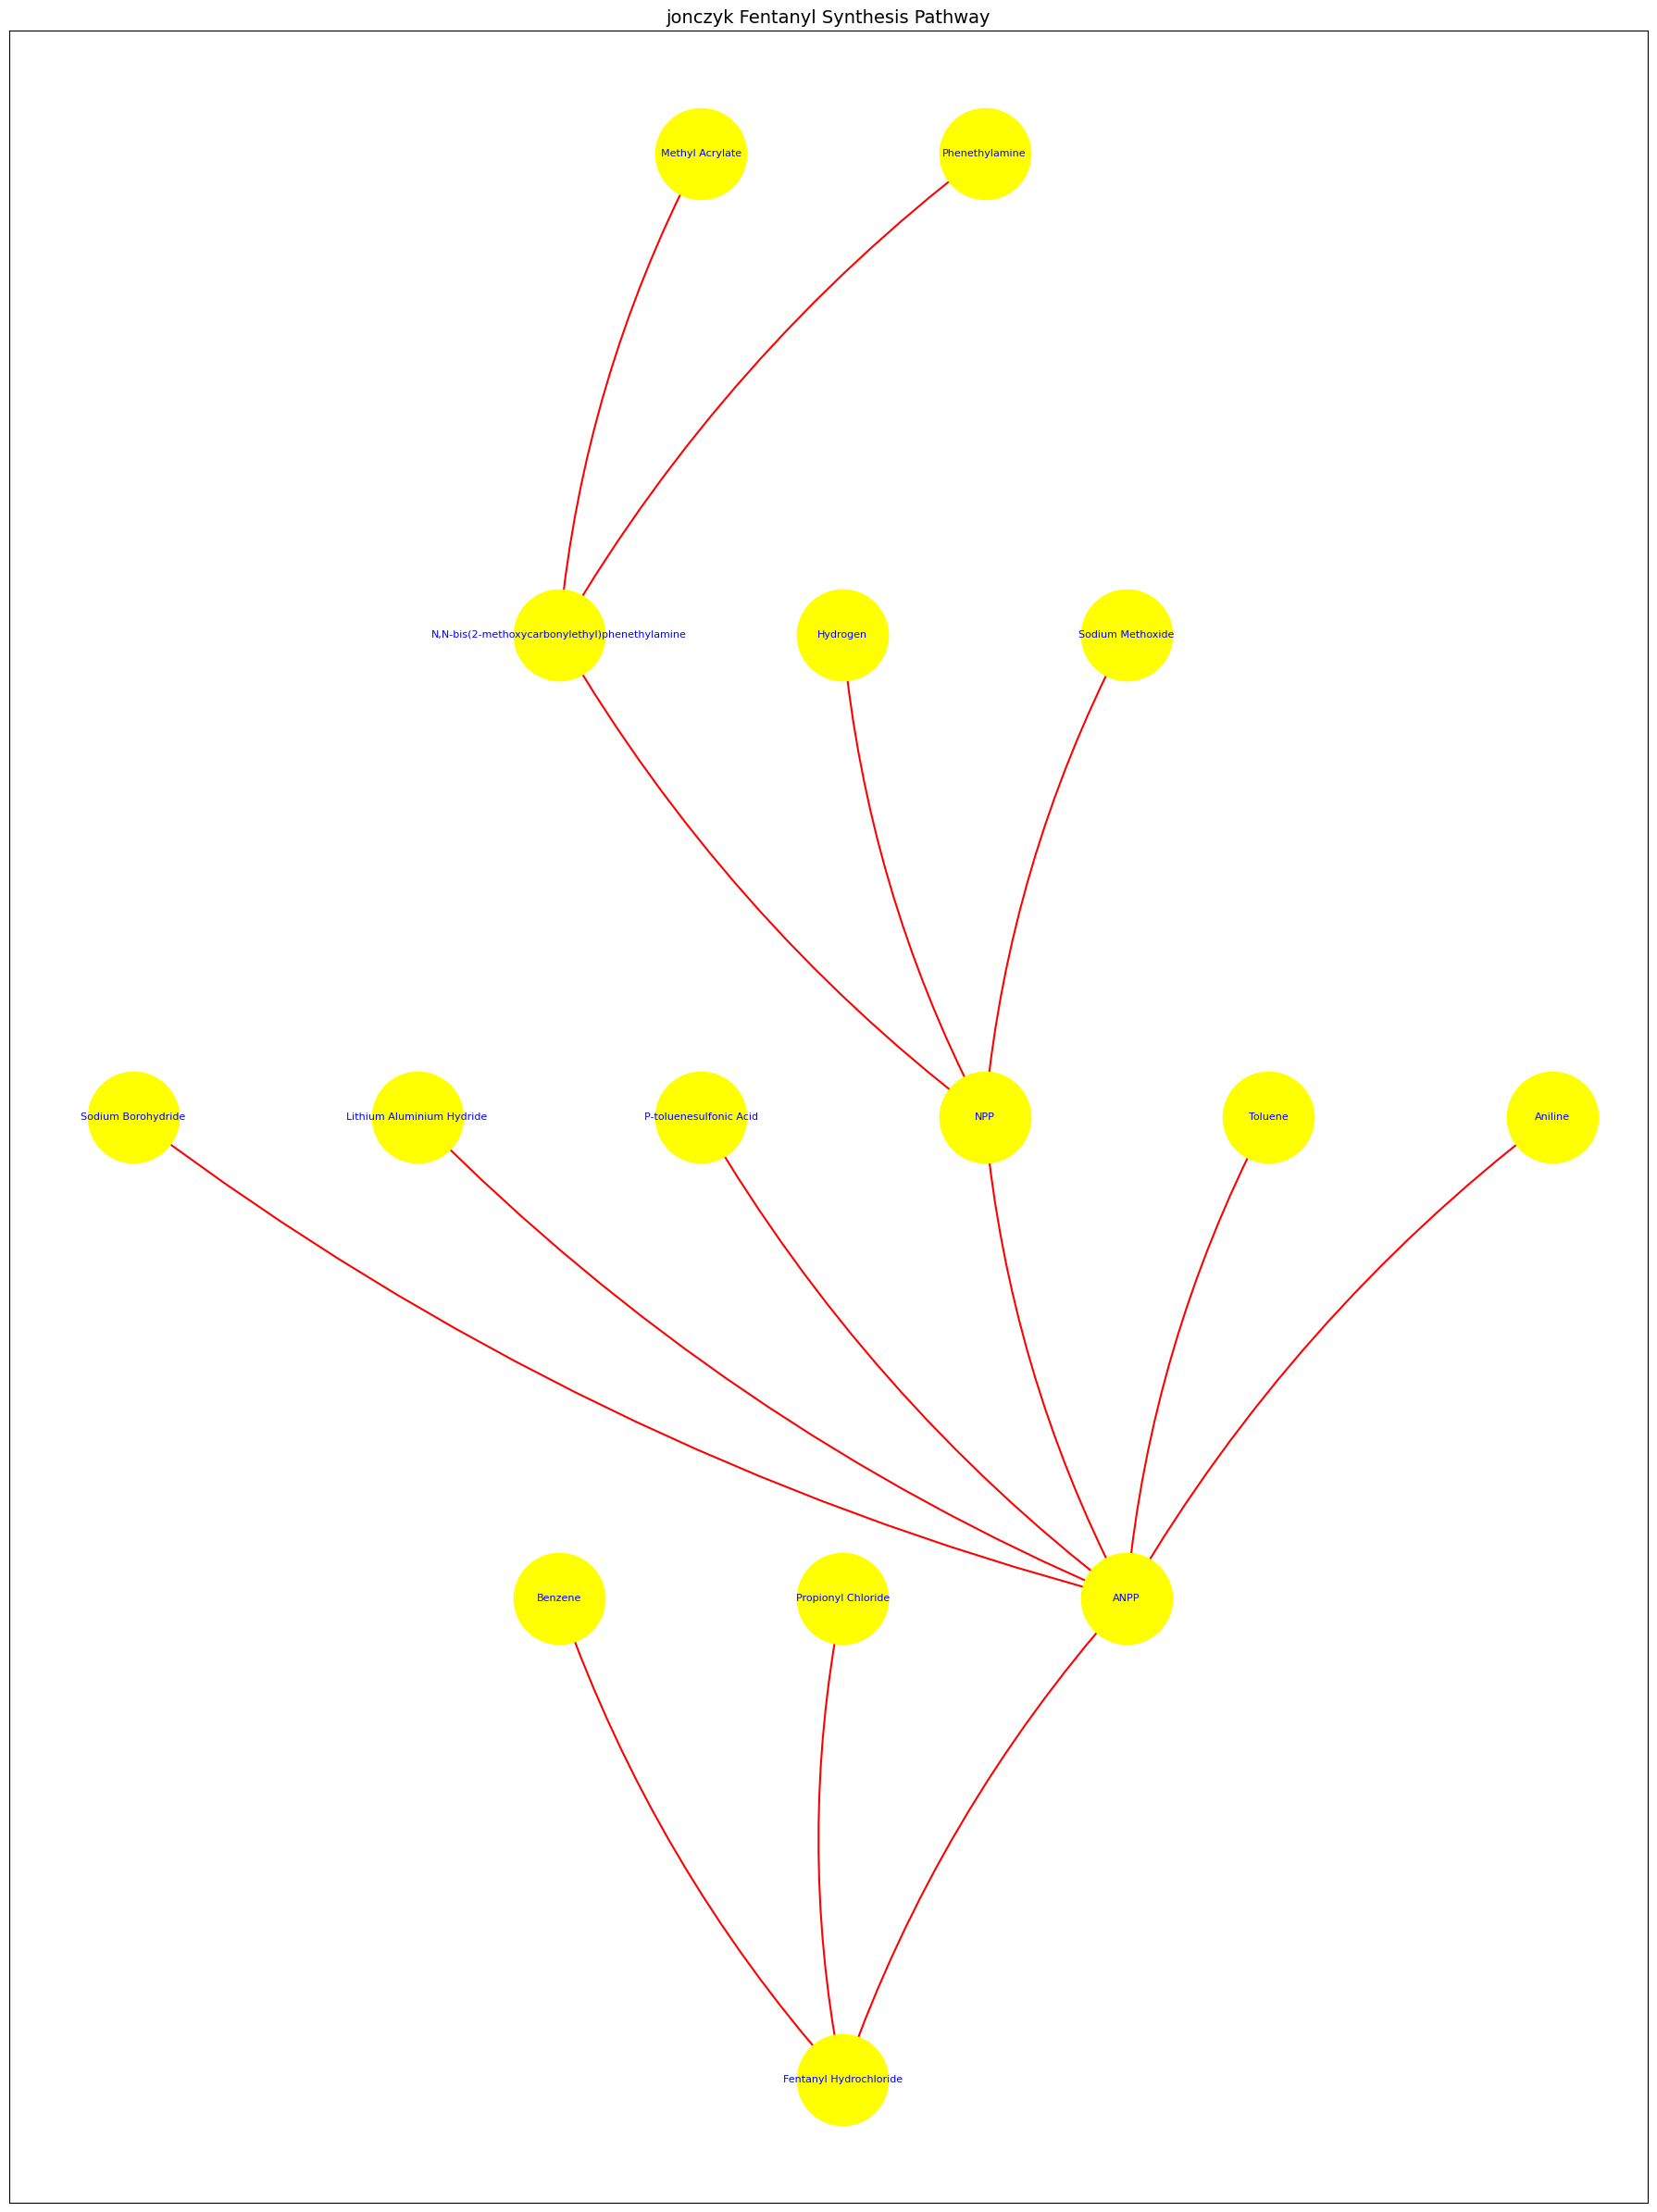

In [5]:
# Step 1: Create a MultiDiGraph
jonczyk_fentanyl = nx.MultiDiGraph()

jonczyk_fentanyl_nodes_1= ['Phenethylamine', 'Methyl Acrylate']
jonczyk_fentanyl_nodes_2= ['Sodium Methoxide', 'Hydrogen', 'N,N-bis(2-methoxycarbonylethyl)phenethylamine']
jonczyk_fentanyl_nodes_3= ['Aniline', 'Toluene', 'NPP', 'P-toluenesulfonic Acid', 'Lithium Aluminium Hydride','Sodium Borohydride']
jonczyk_fentanyl_nodes_4= ['ANPP', 'Propionyl Chloride','Benzene']
jonczyk_fentanyl.add_node('Fentanyl Hydrochloride', layer=1)

for i in jonczyk_fentanyl_nodes_4:
    jonczyk_fentanyl.add_node(i, layer=2)
    jonczyk_fentanyl.add_edge(i, 'Fentanyl Hydrochloride', key='jonczyk', label='jonczyk')

for i in jonczyk_fentanyl_nodes_3:
    jonczyk_fentanyl.add_node(i, layer=3)
    jonczyk_fentanyl.add_edge(i, 'ANPP', key='jonczyk', label='jonczyk')

for i in jonczyk_fentanyl_nodes_2:
    jonczyk_fentanyl.add_node(i, layer=4)
    jonczyk_fentanyl.add_edge(i, 'NPP', key='jonczyk', label='jonczyk')

for i in jonczyk_fentanyl_nodes_1:
    jonczyk_fentanyl.add_node(i, layer=5)
    jonczyk_fentanyl.add_edge(i, 'N,N-bis(2-methoxycarbonylethyl)phenethylamine', key='jonczyk', label='jonczyk')

# Step 5: Draw the graph
plt.figure(figsize=(18, 24))

# Generate multipartite layout
post = nx.multipartite_layout(jonczyk_fentanyl, subset_key="layer", scale=2)

# Optional: rotate the layout
# If rotate_layout isn't defined, use manual alternative
post = {node: (y, x) for node, (x, y) in post.items()}

# Draw nodes and labels
nx.draw_networkx_nodes(jonczyk_fentanyl, pos=post, node_color="yellow", node_size=5000)
nx.draw_networkx_labels(jonczyk_fentanyl, pos=post, font_size=8, font_color="blue")

# Draw directed edges (with curved style for future compatibility)
for u, v, k, data in jonczyk_fentanyl.edges(data=True, keys=True):
    nx.draw_networkx_edges(
        jonczyk_fentanyl,
        pos=post,
        edgelist=[(u, v)],
        edge_color='red',
        arrows=True,
        width=1.5,
        connectionstyle='arc3,rad=0.1'  # Curved edges for parallel appearance if needed
    )

# Final touches
plt.title("jonczyk Fentanyl Synthesis Pathway", fontsize=14)
plt.tight_layout()
plt.savefig('jonczyk_BOM.png', dpi=1200)
plt.show()

Union of Jensen, Zee, and vlm variants

Bill-of-material representation for Optimal Fentanyl Variant

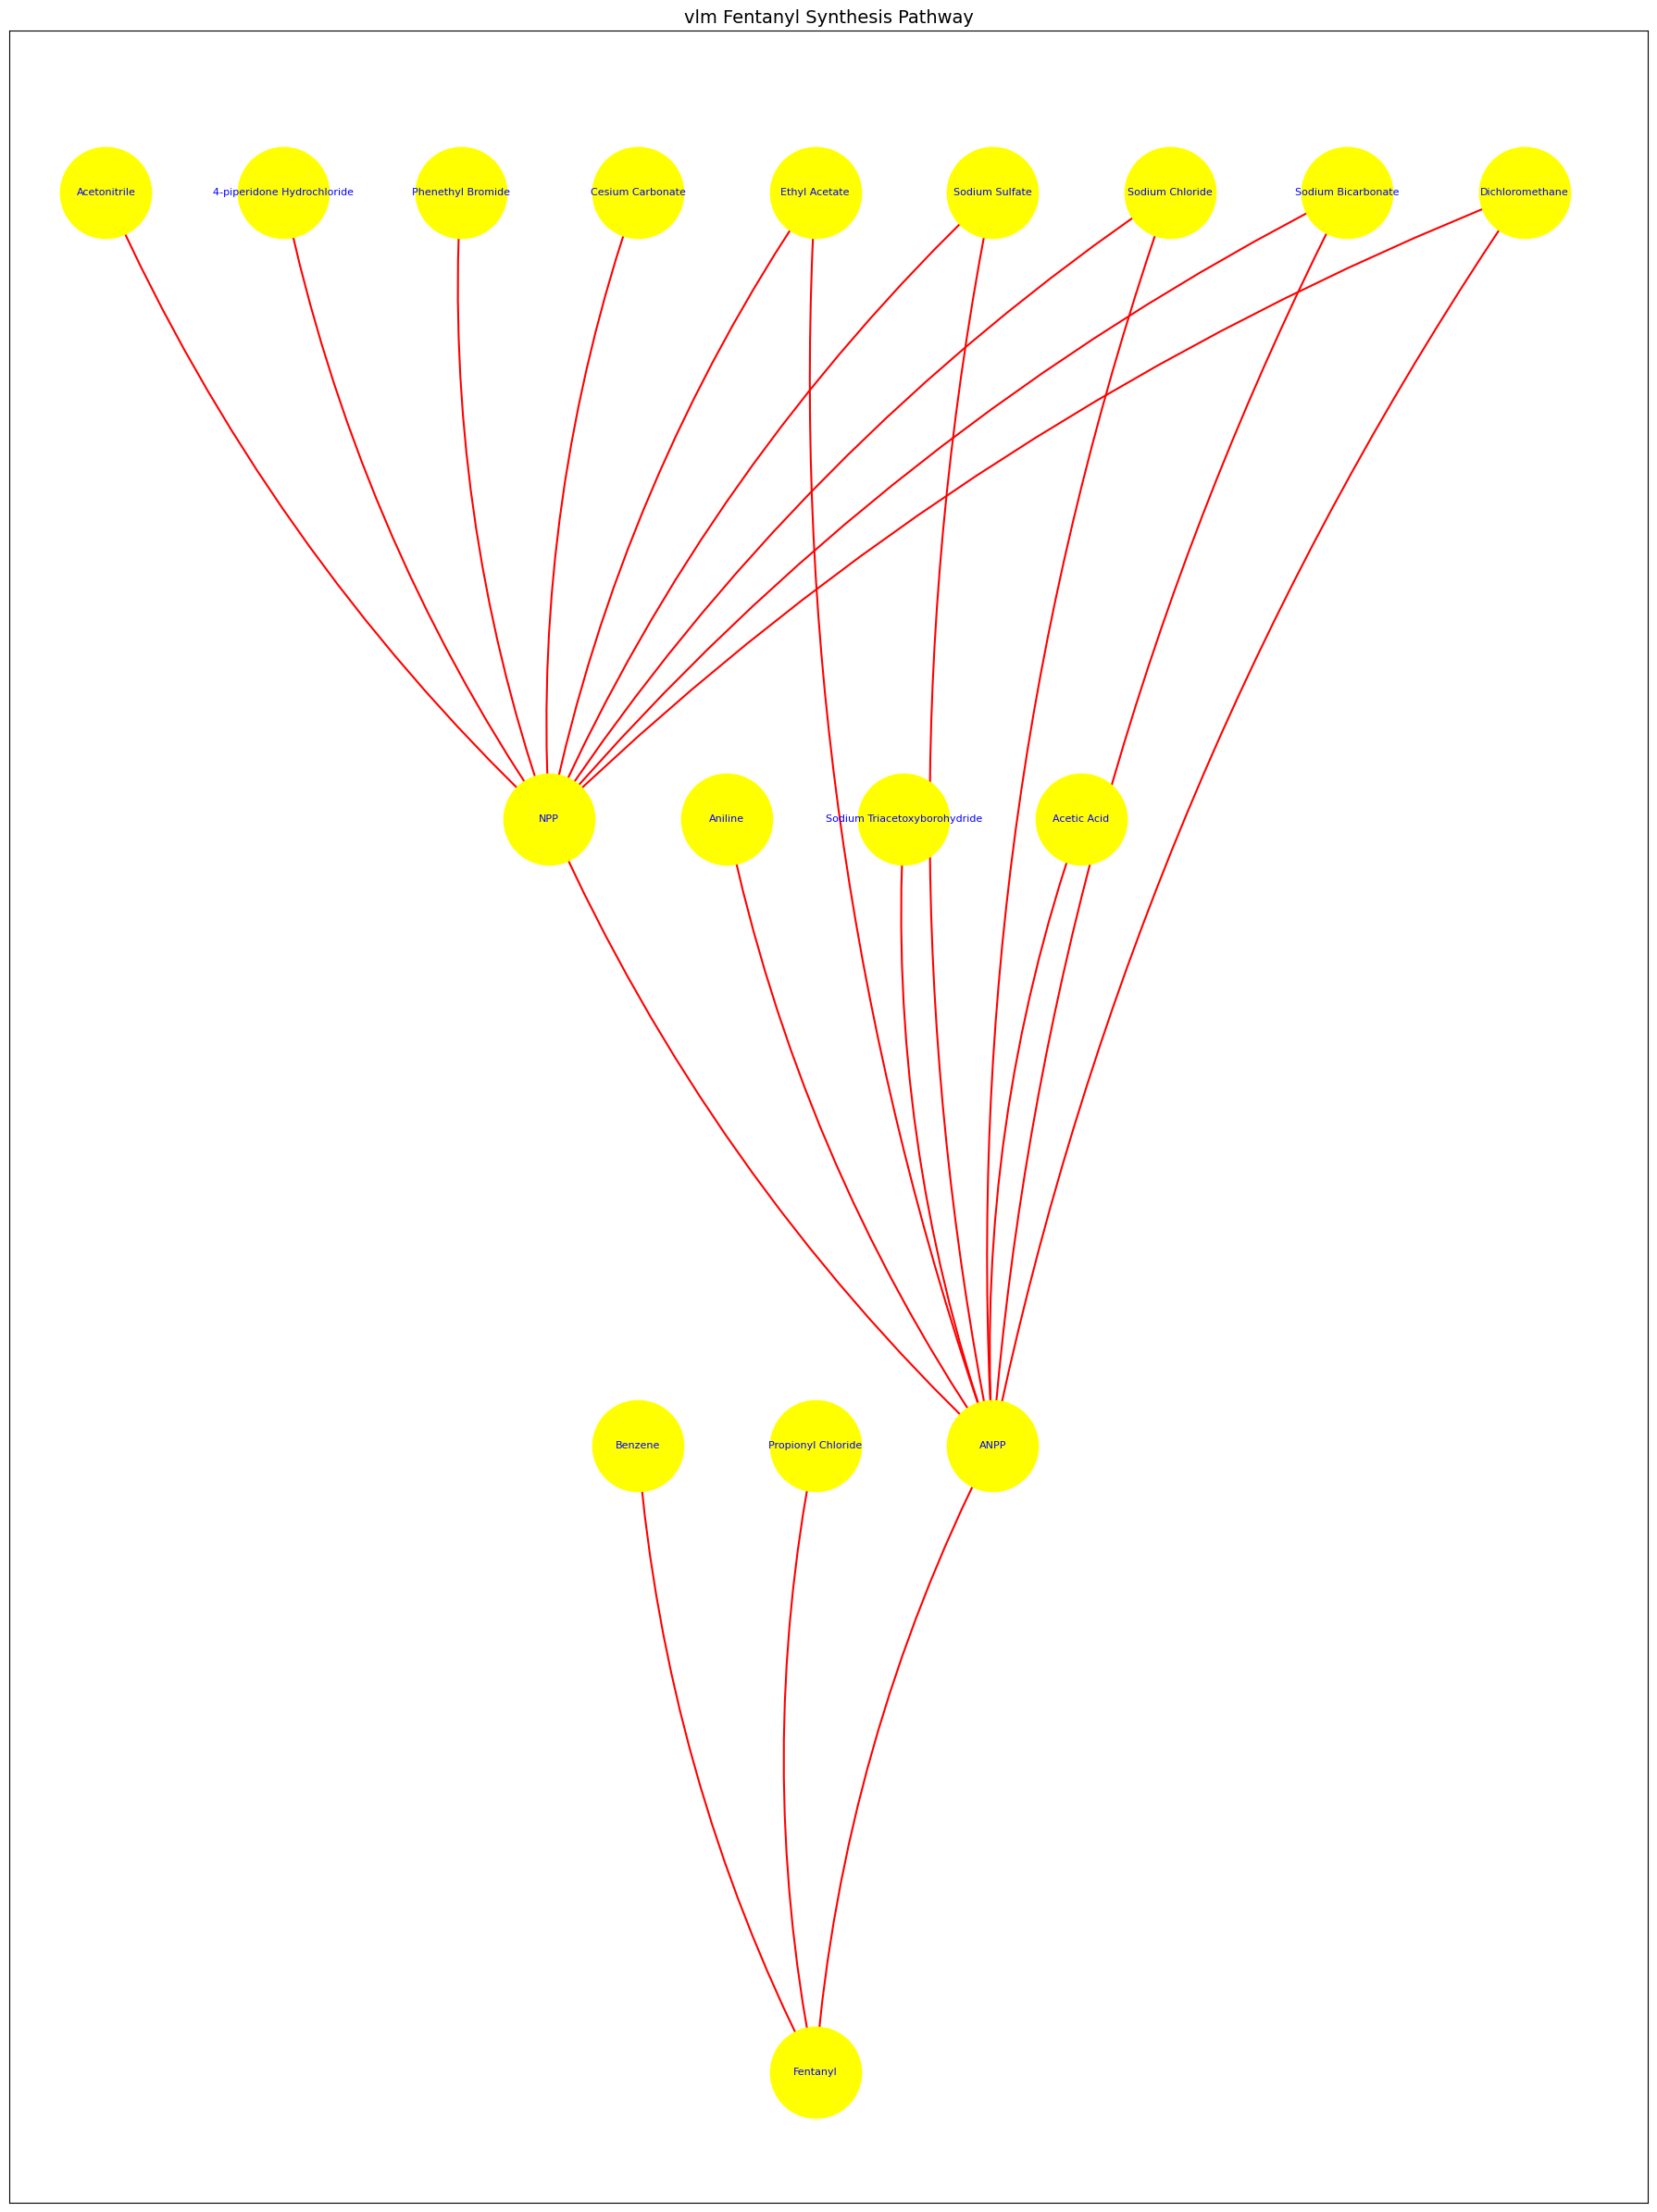

In [6]:
# Step 1: Create a MultiDiGraph
vlm_fentanyl = nx.MultiDiGraph()

vlm_fentanyl_nodes_1= ["Sodium Chloride", "Sodium Bicarbonate", "Sodium Sulfate", "Cesium Carbonate", "Phenethyl Bromide", "4-piperidone Hydrochloride", "Acetonitrile", "Ethyl Acetate", "Dichloromethane"]
vlm_fentanyl_nodes_2= ["Acetic Acid", "Sodium Triacetoxyborohydride", "Aniline", "Dichloromethane", "Sodium Bicarbonate", "Sodium Chloride", "Sodium Sulfate", "Ethyl Acetate", "NPP"]
vlm_fentanyl_nodes_3= ['ANPP', 'Propionyl Chloride','Benzene']
vlm_fentanyl.add_node('Fentanyl', layer=1)

for i in vlm_fentanyl_nodes_3:
    vlm_fentanyl.add_node(i, layer=2)
    vlm_fentanyl.add_edge(i, 'Fentanyl', key='vlm', label='vlm')

for i in vlm_fentanyl_nodes_2:
    vlm_fentanyl.add_node(i, layer=3)
    vlm_fentanyl.add_edge(i, 'ANPP', key='vlm', label='vlm')

for i in vlm_fentanyl_nodes_1:
    vlm_fentanyl.add_node(i, layer=4)
    vlm_fentanyl.add_edge(i, 'NPP', key='vlm', label='vlm')

# Step 5: Draw the graphf
plt.figure(figsize=(18, 24))

# Generate multipartite layout
post = nx.multipartite_layout(vlm_fentanyl, subset_key="layer", scale=2)

# Optional: rotate the layout
# If rotate_layout isn't defined, use manual alternative
post = {node: (y, x) for node, (x, y) in post.items()}

# Draw nodes and labels
nx.draw_networkx_nodes(vlm_fentanyl, pos=post, node_color="yellow", node_size=5000)
nx.draw_networkx_labels(vlm_fentanyl, pos=post, font_size=8, font_color="blue")

# Draw directed edges (with curved style for future compatibility)
for u, v, k, data in vlm_fentanyl.edges(data=True, keys=True):
    nx.draw_networkx_edges(
        vlm_fentanyl,
        pos=post,
        edgelist=[(u, v)],
        edge_color='red',
        arrows=True,
        width=1.5,
        connectionstyle='arc3,rad=0.1'  # Curved edges for parallel appearance if needed
    )

# Final touches
plt.title("vlm Fentanyl Synthesis Pathway", fontsize=14)
plt.tight_layout()
plt.savefig('vlm_BOM.png', dpi=1200)
plt.show()

Union of Jensen, vlm, Zee, and Optimal

Bill-of-material representation for Gupta Fentanyl

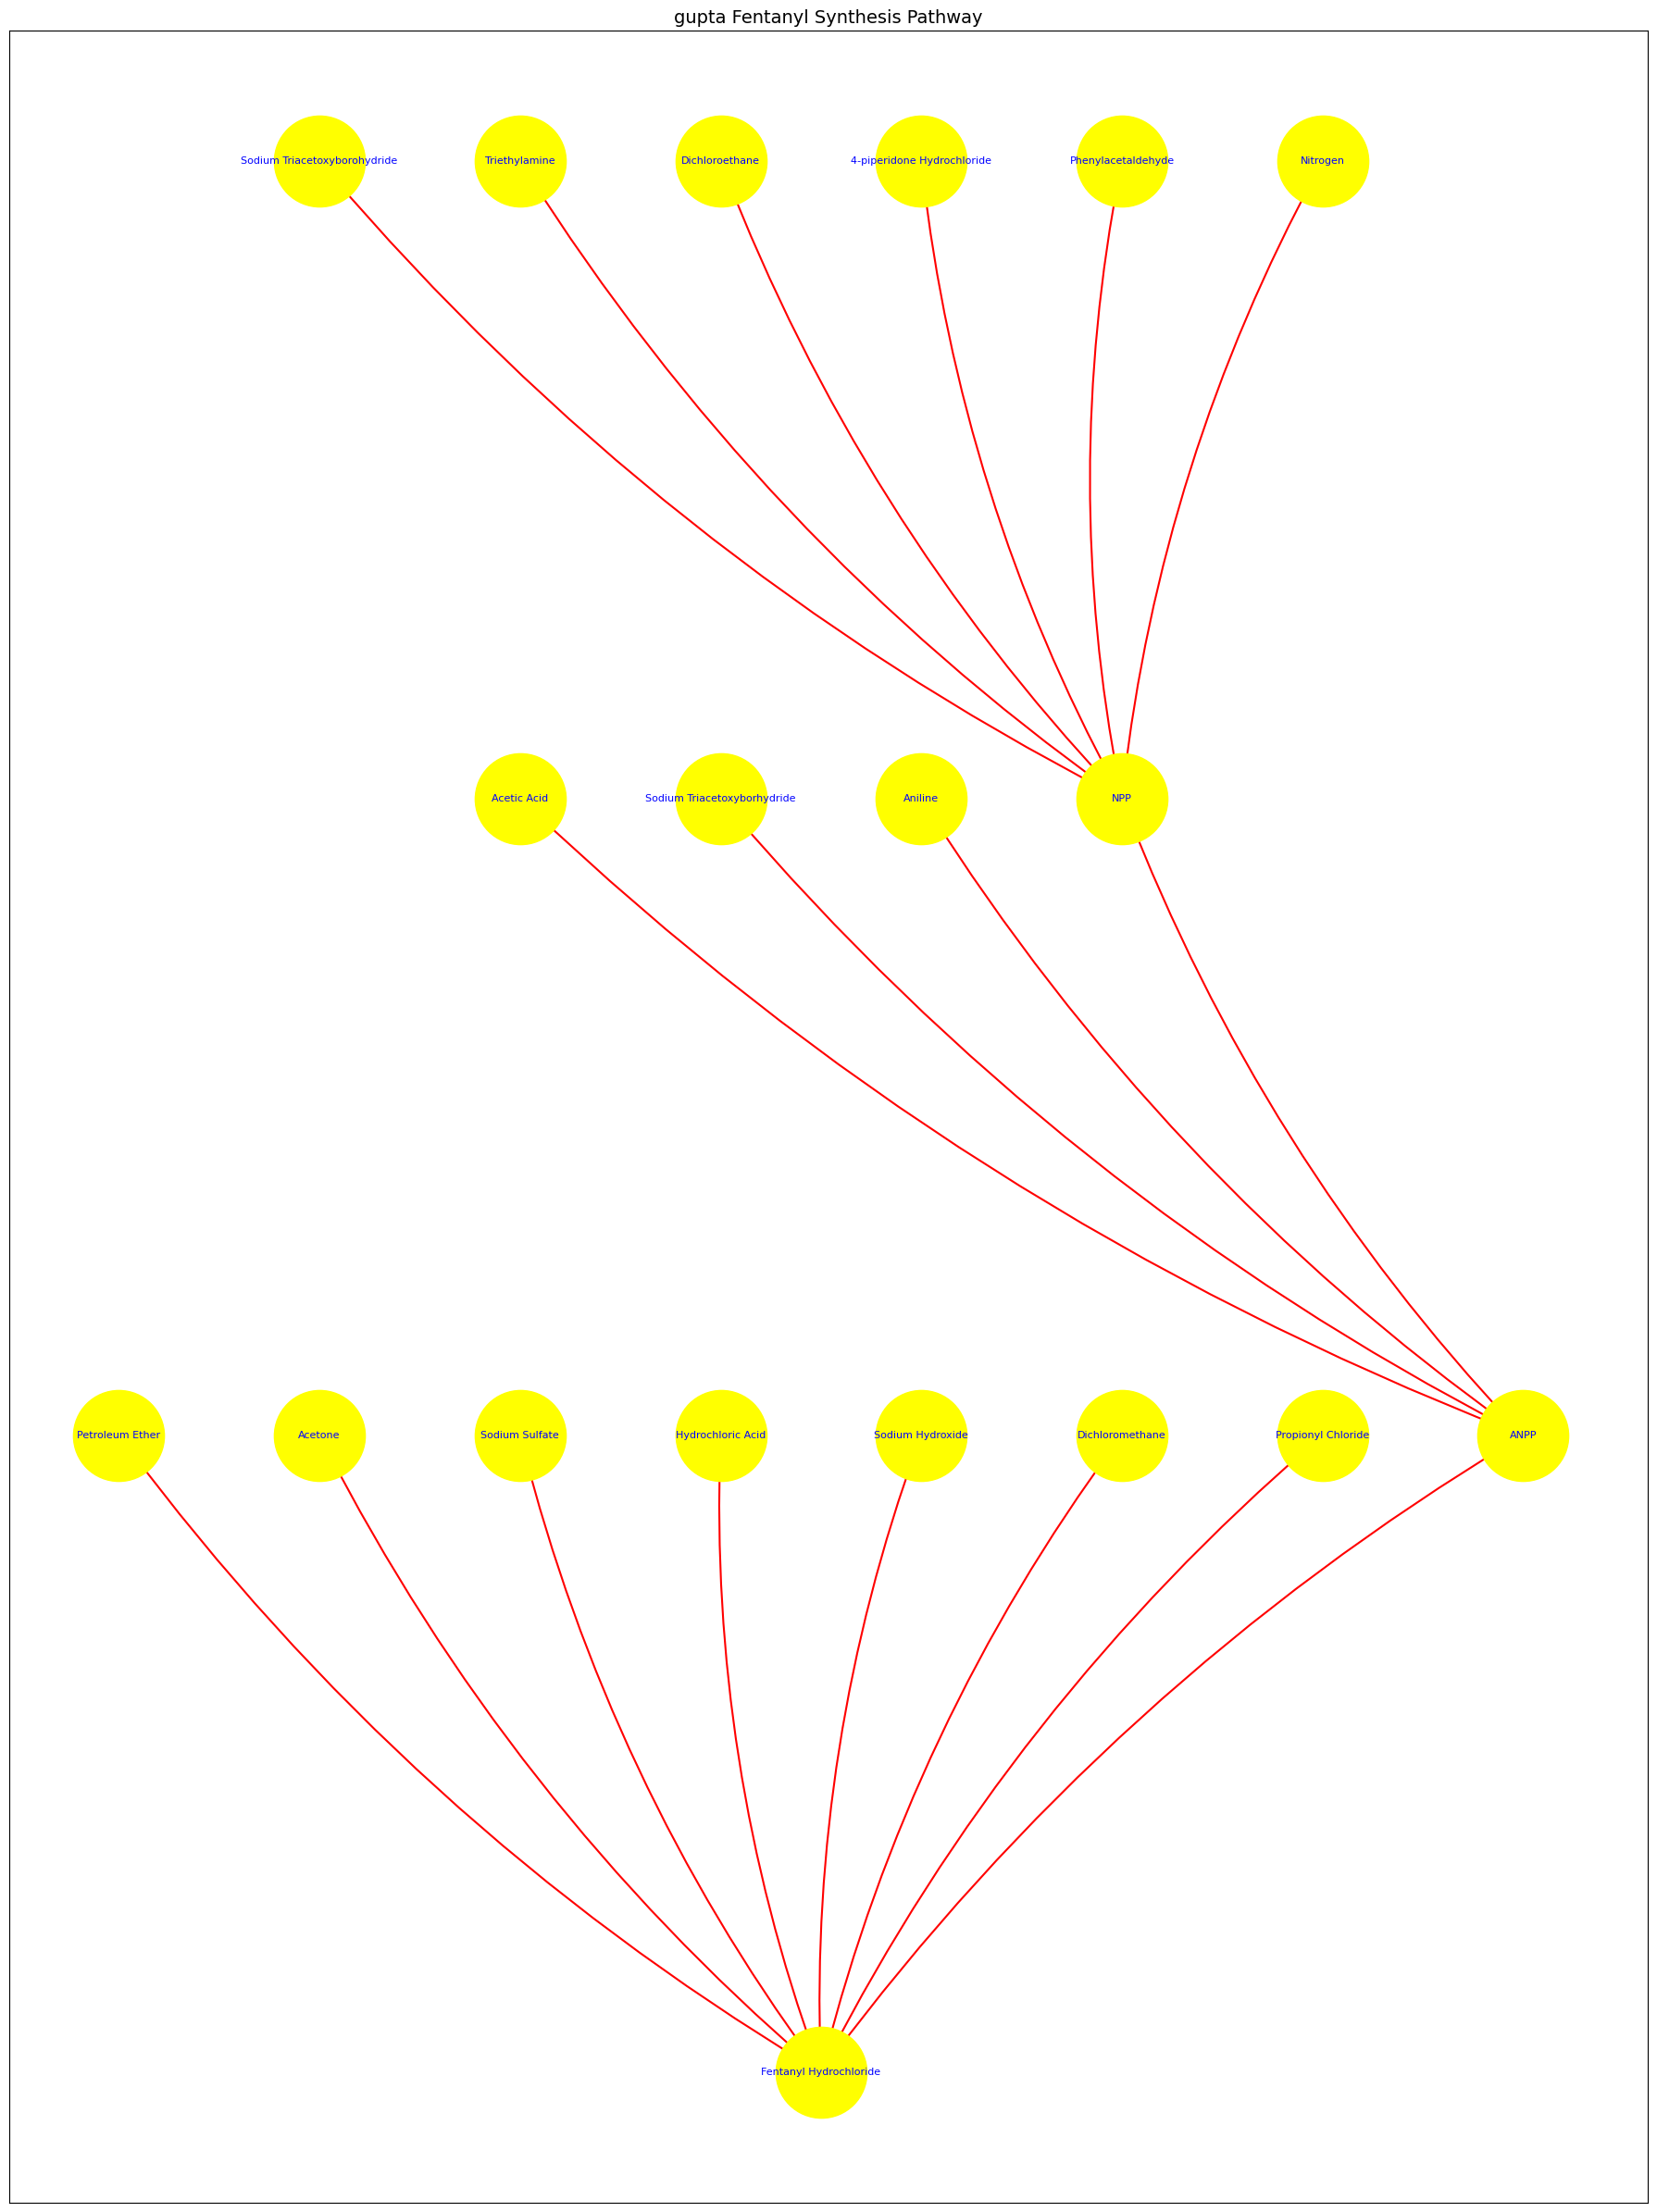

In [7]:
# Step 1: Create a MultiDiGraph
gupta_fentanyl = nx.MultiDiGraph()

gupta_fentanyl_nodes_1=['Nitrogen','Phenylacetaldehyde','4-piperidone Hydrochloride','Dichloroethane','Triethylamine','Sodium Triacetoxyborohydride']
gupta_fentanyl_nodes_2=['NPP','Aniline','Sodium Triacetoxyborhydride','Acetic Acid']
gupta_fentanyl_nodes_3=['ANPP','Propionyl Chloride','Dichloromethane','Sodium Hydroxide','Hydrochloric Acid','Sodium Sulfate','Acetone','Sodium Hydroxide','Petroleum Ether']
gupta_fentanyl.add_node('Fentanyl Hydrochloride', layer=1)

for i in gupta_fentanyl_nodes_3:
    gupta_fentanyl.add_node(i, layer=2)
    gupta_fentanyl.add_edge(i, 'Fentanyl Hydrochloride', key='gupta', label='gupta')

for i in gupta_fentanyl_nodes_2:
    gupta_fentanyl.add_node(i, layer=3)
    gupta_fentanyl.add_edge(i, 'ANPP', key='gupta', label='gupta')

for i in gupta_fentanyl_nodes_1:
    gupta_fentanyl.add_node(i, layer=4)
    gupta_fentanyl.add_edge(i, 'NPP', key='gupta', label='gupta')

# Step 5: Draw the graphf
plt.figure(figsize=(18, 24))

# Generate multipartite layout
post = nx.multipartite_layout(gupta_fentanyl, subset_key="layer", scale=2)

# Optional: rotate the layout
# If rotate_layout isn't defined, use manual alternative
post = {node: (y, x) for node, (x, y) in post.items()}

# Draw nodes and labels
nx.draw_networkx_nodes(gupta_fentanyl, pos=post, node_color="yellow", node_size=5000)
nx.draw_networkx_labels(gupta_fentanyl, pos=post, font_size=8, font_color="blue")

# Draw directed edges (with curved style for future compatibility)
for u, v, k, data in gupta_fentanyl.edges(data=True, keys=True):
    nx.draw_networkx_edges(
        gupta_fentanyl,
        pos=post,
        edgelist=[(u, v)],
        edge_color='red',
        arrows=True,
        width=1.5,
        connectionstyle='arc3,rad=0.1'  # Curved edges for parallel appearance if needed
    )

# Final touches
plt.title("gupta Fentanyl Synthesis Pathway", fontsize=14)
plt.tight_layout()
plt.savefig('gupta_BOM.png', dpi=1200)
plt.show()

Union of Jensen, vlm, Zee, Optimal and Gupta Variant

Sigfried Fentanyl

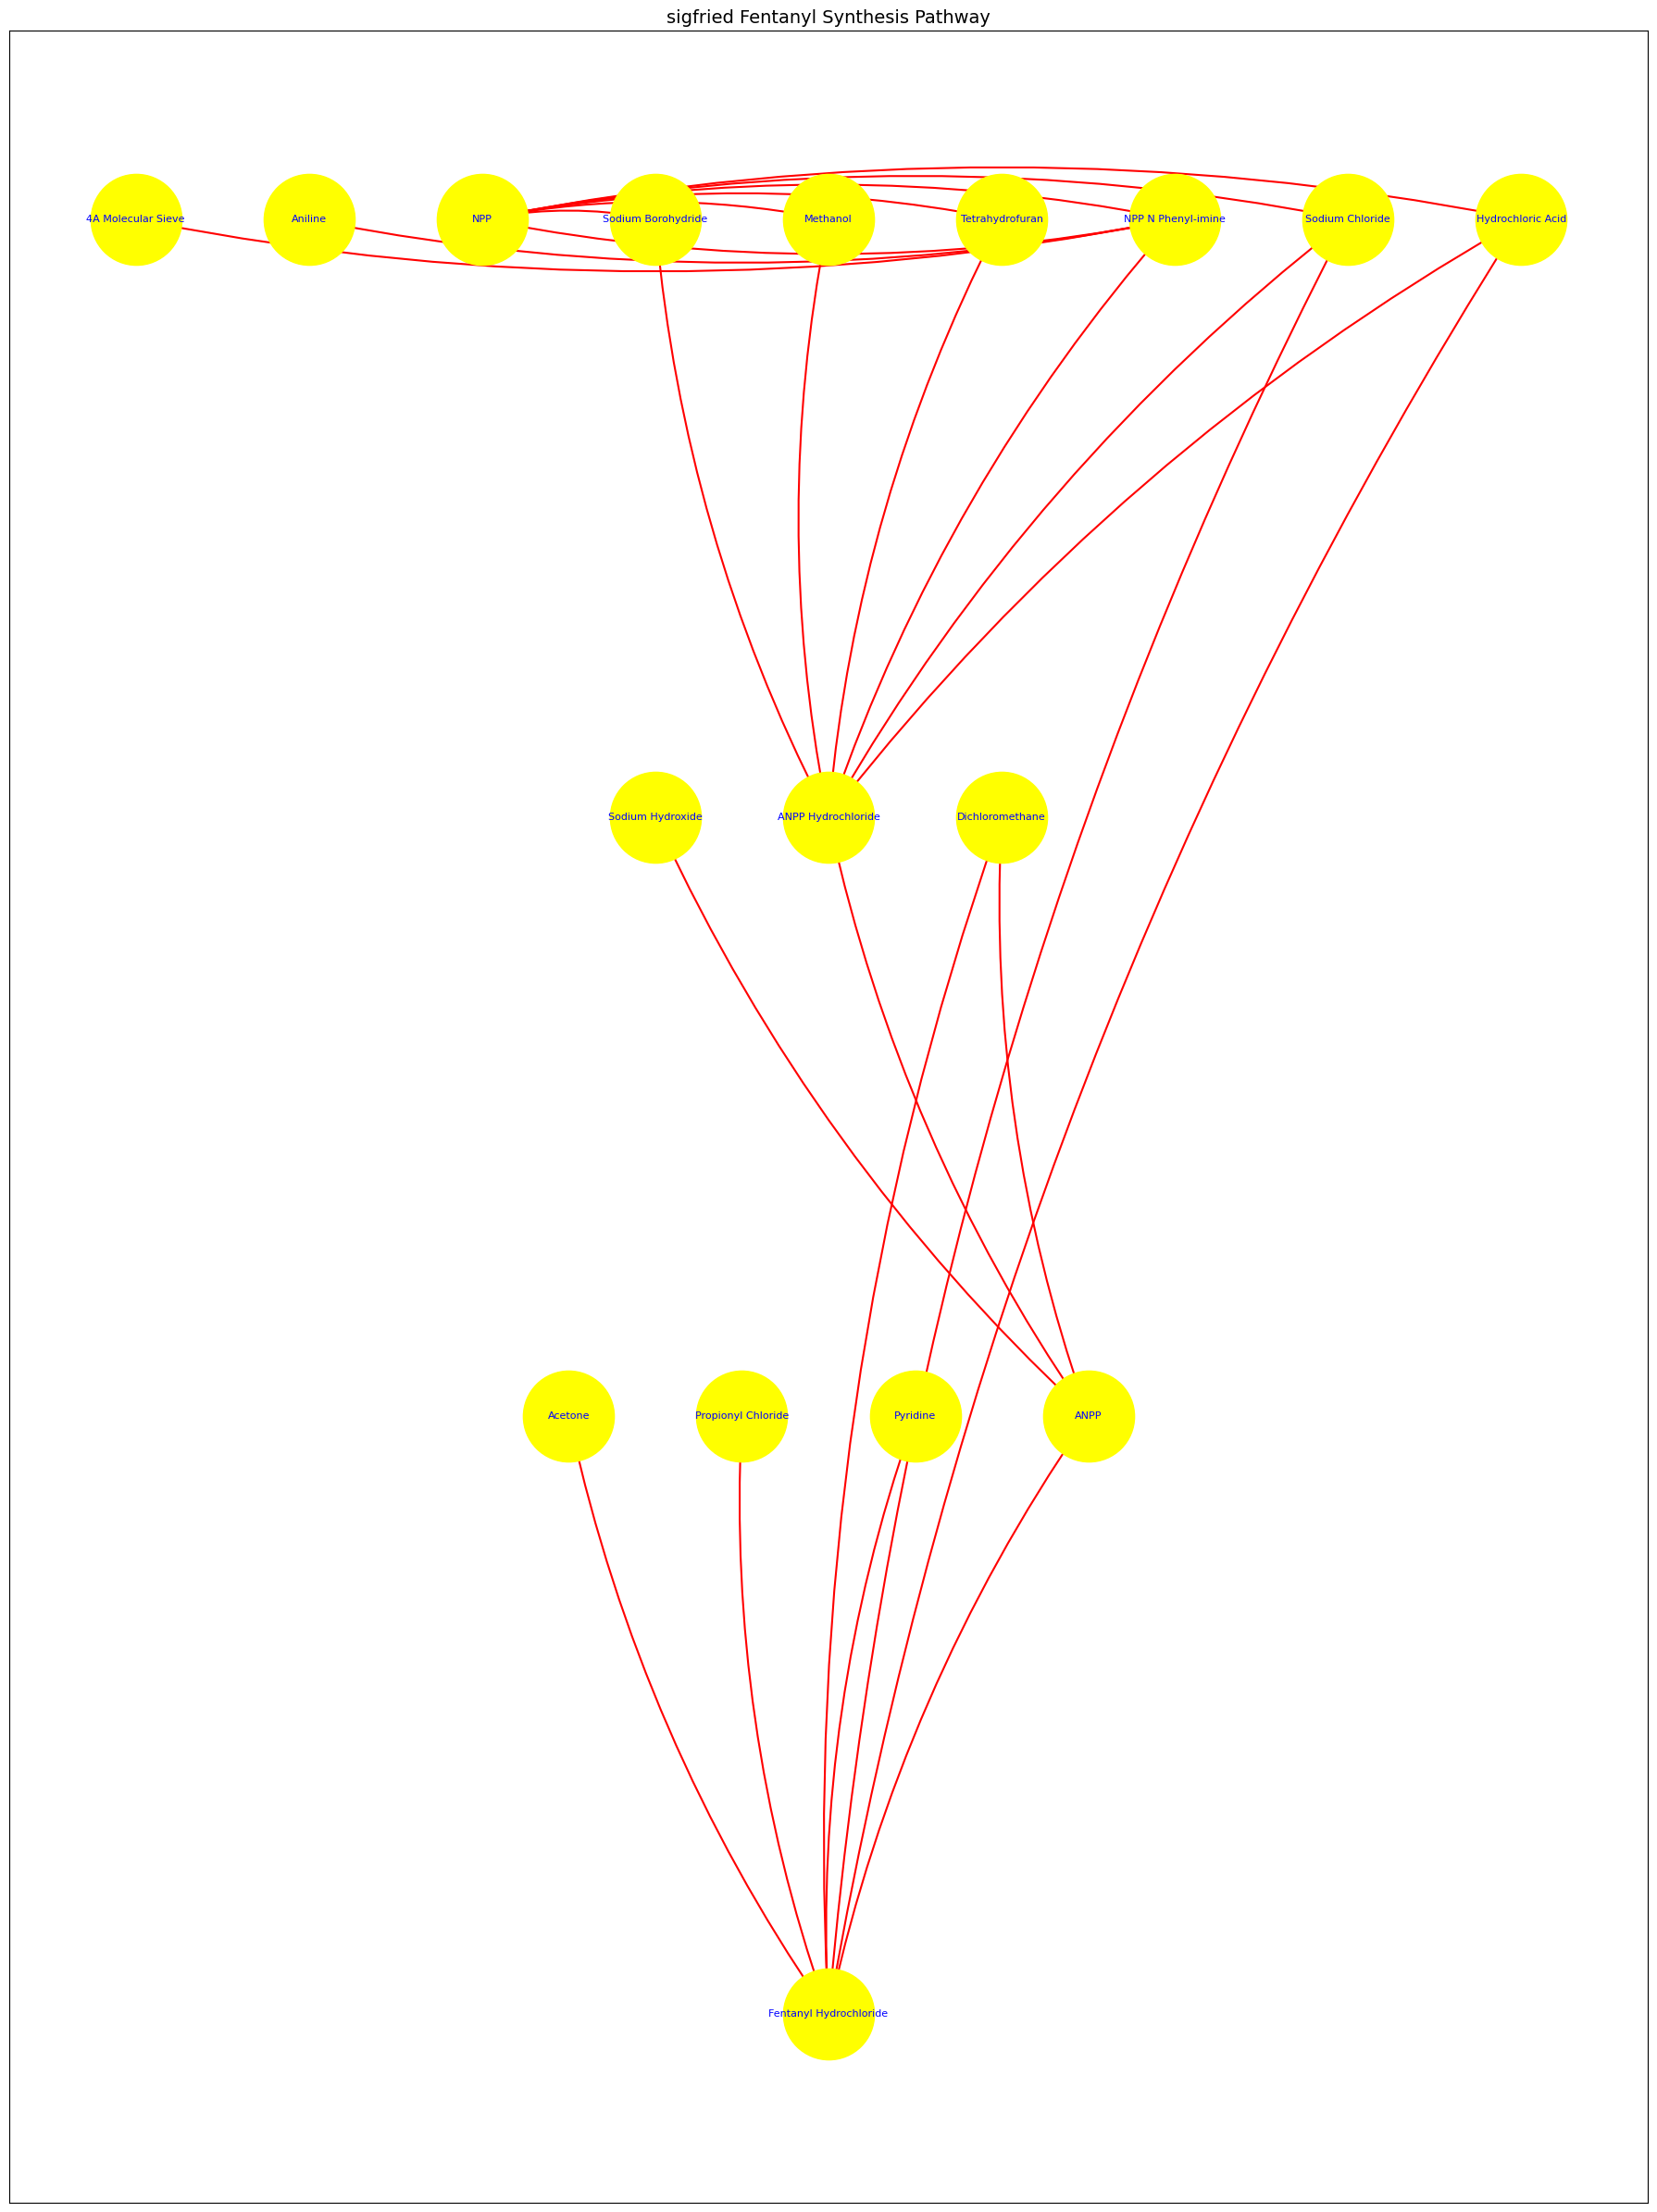

In [8]:
# Step 1: Create a MultiDiGraph
sigfried_fentanyl = nx.MultiDiGraph()

sigfried_fentanyl_nodes_1=['4-piperidone Hydrochloride','Acetonitrile','Potassium Carbonate','TBAB','TEBA','Polyethylene Glycol','Phenethyl Bromide','Phenethyl Tosylate','Sodium Sulfate']
sigfried_fentanyl_nodes_2=['NPP','Aniline','4A Molecular Sieve']
sigfried_fentanyl_nodes_3=['NPP N Phenyl-imine','Tetrahydrofuran','Methanol','Sodium Borohydride','Hydrochloric Acid','Sodium Chloride']
sigfried_fentanyl_nodes_4=['ANPP Hydrochloride','Sodium Hydroxide','Dichloromethane']
sigfried_fentanyl_nodes_5=['ANPP','Pyridine','Propionyl Chloride','Hydrochloric Acid','Dichloromethane','Sodium Chloride','Acetone']
sigfried_fentanyl.add_node('Fentanyl Hydrochloride', layer=1)

for i in sigfried_fentanyl_nodes_5:
    sigfried_fentanyl.add_node(i, layer=2)
    sigfried_fentanyl.add_edge(i, 'Fentanyl Hydrochloride', key='sigfried', label='sigfried')

for i in sigfried_fentanyl_nodes_4:
    sigfried_fentanyl.add_node(i, layer=3)
    sigfried_fentanyl.add_edge(i, 'ANPP', key='sigfried', label='sigfried')

for i in sigfried_fentanyl_nodes_3:
    sigfried_fentanyl.add_node(i, layer=4)
    sigfried_fentanyl.add_edge(i, 'ANPP Hydrochloride', key='sigfried', label='sigfried')

for i in sigfried_fentanyl_nodes_2:
    sigfried_fentanyl.add_node(i, layer=4)
    sigfried_fentanyl.add_edge(i, 'NPP N Phenyl-imine', key='sigfried', label='sigfried')

for i in sigfried_fentanyl_nodes_3:
    sigfried_fentanyl.add_node(i, layer=4)
    sigfried_fentanyl.add_edge(i, 'NPP', key='sigfried', label='sigfried')
# Step 5: Draw the graphf
plt.figure(figsize=(18, 24))

# Generate multipartite layout
post = nx.multipartite_layout(sigfried_fentanyl, subset_key="layer", scale=2)

# Optional: rotate the layout
# If rotate_layout isn't defined, use manual alternative
post = {node: (y, x) for node, (x, y) in post.items()}

# Draw nodes and labels
nx.draw_networkx_nodes(sigfried_fentanyl, pos=post, node_color="yellow", node_size=5000)
nx.draw_networkx_labels(sigfried_fentanyl, pos=post, font_size=8, font_color="blue")

# Draw directed edges (with curved style for future compatibility)
for u, v, k, data in sigfried_fentanyl.edges(data=True, keys=True):
    nx.draw_networkx_edges(
        sigfried_fentanyl,
        pos=post,
        edgelist=[(u, v)],
        edge_color='red',
        arrows=True,
        width=1.5,
        connectionstyle='arc3,rad=0.1'  # Curved edges for parallel appearance if needed
    )

# Final touches
plt.title("sigfried Fentanyl Synthesis Pathway", fontsize=14)
plt.tight_layout()
plt.savefig('sigfried_BOM.png', dpi=1200)
plt.show()

Union of Jensen, Zee, vlm, Gupta, Optimal, and Sigfried

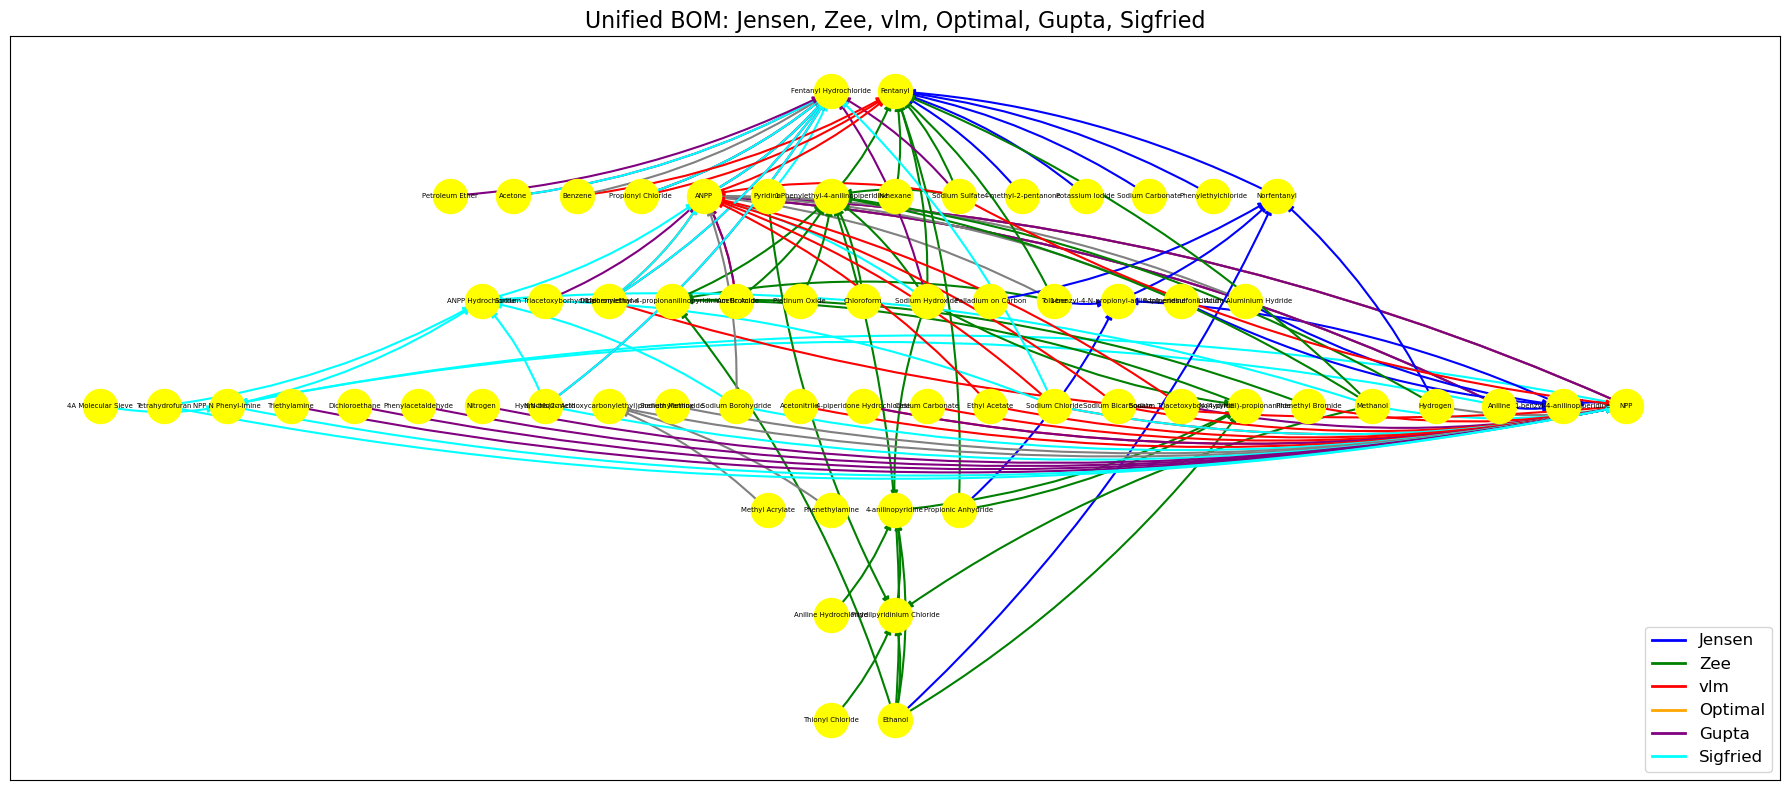

In [9]:
import matplotlib.pyplot as plt
import networkx as nx

# Step 1: Compose all graphs into one MultiDiGraph
Union = nx.compose_all([
    jensen_fentanyl,
    zee_fentanyl,
    vlm_fentanyl,
    jonczyk_fentanyl,
    gupta_fentanyl,
    sigfried_fentanyl
])

# Step 2: Multipartite layout with top-down flip
post = nx.multipartite_layout(Union, subset_key="layer", scale=2)
post = {node: (y, -x) for node, (x, y) in post.items()}

# Step 3: Assign edge colors based on 'label'
edge_colors = []
for u, v, k, data in Union.edges(data=True, keys=True):
    label = data.get("label", "").lower()
    if label == 'jensen':
        edge_colors.append('blue')
    elif label == 'zee':
        edge_colors.append('green')
    elif label == 'vlm':
        edge_colors.append('red')
    elif label == 'optimal':
        edge_colors.append('orange')
    elif label == 'gupta':
        edge_colors.append('purple')
    elif label == 'sigfried':
        edge_colors.append('cyan')
    else:
        edge_colors.append('gray')  # fallback/default

# Step 4: Draw unified graph
plt.figure(figsize=(18, 8))

# Draw nodes and labels
nx.draw_networkx_nodes(Union, pos=post, node_color="yellow", node_size=600)
nx.draw_networkx_labels(Union, pos=post, font_size=5, font_color="black")

# Draw directed curved edges with color
for (u, v, k, data), color in zip(Union.edges(keys=True, data=True), edge_colors):
    nx.draw_networkx_edges(
        Union,
        pos=post,
        edgelist=[(u, v)],
        edge_color=color,
        arrows=True,
        width=1.5,
        connectionstyle="arc3,rad=0.1"
    )

# Step 5: Legend
legend_elements = [
    plt.Line2D([0], [0], color='blue', lw=2, label='Jensen'),
    plt.Line2D([0], [0], color='green', lw=2, label='Zee'),
    plt.Line2D([0], [0], color='red', lw=2, label='vlm'),
    plt.Line2D([0], [0], color='orange', lw=2, label='Optimal'),
    plt.Line2D([0], [0], color='purple', lw=2, label='Gupta'),
    plt.Line2D([0], [0], color='cyan', lw=2, label='Sigfried')
]
plt.legend(handles=legend_elements, loc='lower right', fontsize=12)

# Step 6: Final formatting
plt.title("Unified BOM: Jensen, Zee, vlm, Optimal, Gupta, Sigfried", fontsize=16)
plt.tight_layout()
plt.savefig("Unified_BOM_All_6_Sources.png", dpi=1200)
plt.show()



Diads and Triplets

In [10]:
from collections import Counter

# Count all edges between node pairs
edge_counts = Counter((u, v) for u, v, k in Union.edges(keys=True))

# Print all node pairs with multiple edges
for (u, v), count in edge_counts.items():
    if count > 1:
        print(f"Multiple edges exist between {u} -> {v}: {count} edges")
print(Union.count())

Multiple edges exist between NPP -> ANPP: 3 edges
Multiple edges exist between Aniline -> ANPP: 3 edges
Multiple edges exist between Acetic Acid -> ANPP: 2 edges
Multiple edges exist between ANPP -> Fentanyl Hydrochloride: 3 edges
Multiple edges exist between Propionyl Chloride -> Fentanyl Hydrochloride: 3 edges
Multiple edges exist between Dichloromethane -> ANPP: 2 edges
Multiple edges exist between Dichloromethane -> Fentanyl Hydrochloride: 2 edges
Multiple edges exist between Sodium Chloride -> NPP: 2 edges
Multiple edges exist between 4-piperidone Hydrochloride -> NPP: 2 edges
Multiple edges exist between Hydrochloric Acid -> Fentanyl Hydrochloride: 2 edges
Multiple edges exist between Acetone -> Fentanyl Hydrochloride: 2 edges


AttributeError: 'MultiDiGraph' object has no attribute 'count'

Dilution Nodes

In [ ]:

dilutant_nodes=['Caffeine','Dipyrone','Mannitol','Inositol','Acetaminophen','Dextrose','Lactose','Talc']
dilution_graph=nx.DiGraph()
dilution_graph.add_node('Diluted Fentanyl',layer=0)
dilution_graph.add_node('Diluted FHCL',layer=0)
for i in dilutant_nodes:
    dilution_graph.add_node(i,layer=1)
    dilution_graph.add_edge(i,'Diluted Fentanyl')
    dilution_graph.add_edge(i,'Diluted FHCL')

    
plt.figure(figsize=(8, 4))  # Increase figure size for better clarity


post =nx.multipartite_layout(dilution_graph,subset_key="layer",scale=2)
post = rotate_layout(post, angle=-90)

# nx.draw(zee_fentanyl, with_labels=True,pos=post,node_color='black',edge_color='green')
# plt.show()

nx.draw(
    dilution_graph,
    pos=post,
    with_labels=True,
    node_color="yellow",
    edge_color="red",
    node_size=500,  # Adjust node size
    font_size=8,    # Adjust font size for readability
    font_color="blue",  # Label color for contrast
    arrows=True,    # Show directed edges with arrows
    width=1.5       # Adjust edge thickness
)

# Add title for better context
plt.title("Dilution pathway", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(18, 12))
Union=nx.compose(Union,dilution_graph)
Union.add_edge('Fentanyl','Diluted Fentanyl')
Union.add_edge('Fentanyl Hydrochloride','Diluted FHCL')
post =nx.multipartite_layout(Union,subset_key="layer")
post = {node: (y, -x) for node, (x, y) in post.items()}

nx.draw(Union,pos=post,with_labels=True,edge_color=['blue','green','red','orange','purple','cyan'])


Adulterant Nodes

In [ ]:
adulterant_nodes=['Tramadol','Methamphetamine','6-acetylmorphine','Xylazine']
adulteration_graph=nx.DiGraph()
adulteration_graph.add_node('Final Product',layer=-1)
for i in adulterant_nodes:
    adulteration_graph.add_node(i,layer=0)
    adulteration_graph.add_edge(i,'Final Product')
adulteration_graph.add_node('Diluted FHCL', layer=0)
adulteration_graph.add_node('Diluted Fentanyl', layer=0)
adulteration_graph.add_edge('Diluted FHCL', 'Final Product',label='default')
adulteration_graph.add_edge('Diluted Fentanyl', 'Final Product')

    # dilution_graph.add_edge(i,'Diluted FHCL')

    
plt.figure(figsize=(8, 4))  # Increase figure size for better clarity


post =nx.multipartite_layout(adulteration_graph,subset_key="layer",scale=2)
post = rotate_layout(post, angle=-90)

# nx.draw(zee_fentanyl, with_labels=True,pos=post,node_color='black',edge_color='green')
# plt.show()

nx.draw(
    adulteration_graph,
    pos=post,
    with_labels=True,
    node_color="yellow",
    edge_color="red",
    node_size=5000,  # Adjust node size
    font_size=8,    # Adjust font size for readability
    font_color="blue",  # Label color for contrast
    arrows=True,    # Show directed edges with arrows
    width=1.5       # Adjust edge thickness
)

# Add title for better context
plt.title("Adulterqation pathway", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(48, 72))
Union=nx.compose(Union,adulteration_graph)

# post =nx.multipartite_layout(Union,subset_key="layer")
# post = {node: (y, -x) for node, (x, y) in post.items()}

# nx.draw(Union,with_labels=True,edge_color=['blue','green','red','black','brown','cyan'])

plt.figure(figsize=(25, 15))  # Increase figure size for better clarity


post =nx.multipartite_layout(Union,subset_key="layer",scale=2)
post = rotate_layout(post, angle=-90)

# nx.draw(zee_fentanyl, with_labels=True,pos=post,node_color='black',edge_color='green')
# plt.show()

nx.draw(Union,pos=post,with_labels=False,node_color='black',node_size=500,edge_color=['blue','green','red','orange','purple','cyan'],width=1.5,arrows=True)  

# Add title for better context
# plt.title("Final pathway", fontsize=14)
plt.tight_layout()
plt.savefig("graph_high_dpi.png", dpi=300)


In [ ]:
jensen_fentanyl_nodes_1=['1-benzylpiperdin-4-one','Aniline']
jensen_fentanyl_nodes_2=['Corresponding Schiff Base','Lithium Aluminium Hydride']
jensen_fentanyl_nodes_3=['Propionic Anhydride','1-benzyl-4-anilinopiperidine']
jensen_fentanyl_nodes_4=['Palladium on Carbon','Hydrogen','1-benzyl-4-N-propionyl-anlinopiperidine']
jensen_fentanyl_nodes_5=['2-phenylehtylchloride','2-phenylethyl Tosylate','Norfentanyl']
jensen=jensen_fentanyl_nodes_1+jensen_fentanyl_nodes_2+jensen_fentanyl_nodes_3+jensen_fentanyl_nodes_4+jensen_fentanyl_nodes_5
zee_fentanyl_nodes_1=['Pyridine','Thionul Chloride']
zee_fentanyl_nodes_2=['Ethanol','Dark Residual Mass']
zee_fentanyl_nodes_3=['Methanol','Yellow Brown Mass']
zee_fentanyl_nodes_4=['Ethanol','Methanol Solution']
zee_fentanyl_nodes_5=['Pyridinium Chloride','Aniline Hydrochloride','Sodium Hydroxide','Zee_mixture_1']
zee_fentanyl_nodes_6=['Propionic Anhydride','4-anilinopyridine','Sodium Hydroxide','Ethanol','Zee_mixture_2']
zee_fentanyl_nodes_7=['Ethanol','Phenylethyl Bromide','Dry Toluene','N-(4-pyridil)-propionanilide']
zee_fentanyl_nodes_8=['Sodium Hydroxide','Chloroform','Sodium Sulfate','Methanol','Platinum Oxide','Hydrogen','Glacial Acetic Acid','Anhydrous Ethanol','1-phenylethyl-4-propionanilinopyridinium Bromide']
zee_fentanyl_nodes_9=['Toluene','Propionic Anhydride','Sodium Hydroxide','Anhydrous Sodium Sulfate','Methanol n-hexane','1-Phenylethyl-4-anilinopiperidine']
zee=zee_fentanyl_nodes_1+zee_fentanyl_nodes_2+zee_fentanyl_nodes_3+zee_fentanyl_nodes_4+zee_fentanyl_nodes_5+zee_fentanyl_nodes_6+zee_fentanyl_nodes_7+zee_fentanyl_nodes_8+zee_fentanyl_nodes_9
vlm_fentanyl_nodes_1=['Phenehtylamine','Methyl Acrylate']
vlm_fentanyl_nodes_2=['Sodium Methoxide','Hydrogen','NPP','N,N-bis(2-methoxycarbonylethyl)phenethylamine']
vlm_fentanyl_nodes_3=['Benzenamine','Toluene','N-Phenethyl-2-Piperidone']
vlm_fentanyl_nodes_4=['Lithium Aluminium Hydride','N-(2-phenylethyl)-2-cyano-N-phenylethylamine']
vlm_fentanyl_nodes_5=['Benzene','Ethyl Chloroformate','N Propyl Aniline']
vlm=vlm_fentanyl_nodes_1+vlm_fentanyl_nodes_2+vlm_fentanyl_nodes_3+vlm_fentanyl_nodes_4+vlm_fentanyl_nodes_5
optim_fentanyl_nodes_1=['Cesium Carbonate','2 -boromethyl benzene','4-piperidone Monohydrate Hydrocholoride']
optim_fentanyl_nodes_2=['Acetic Acid','Sodium Tryacetoxyborohydride','Aniline','Alkylated Piperidone']
optim_fentanyl_nodes_3=['Hunig Base','Propionyl Chloride','4-piperidineamine Precursor']
optim=optim_fentanyl_nodes_1+optim_fentanyl_nodes_2+optim_fentanyl_nodes_3
sigfried_fentanyl_nodes_1=['4-piperidone Hydrochloride','Acetonitrile','Potassium Carbonate','TBAB','TEBA','Polyethylene Glycol','Phenethyl Bromide','Phenethyl Tosylate','Sodium Sulphate']
sigfried_fentanyl_nodes_2=['NPP','Aniline','4A Molecular Sieve']
sigfried_fentanyl_nodes_3=['NPP N Phenyl-imine','Tetrahydrofuran','Dry Methanol','Sodium Borohydride']
sigfried_fentanyl_nodes_4=['Sigfried_Mixture_1','Concentrated Hydrochloric Acid','Saturated Sodium Chloride']
sigfried_fentanyl_nodes_5=['ANPP Hydrochloride','2N Sodium Hydroxide','Dichloromethane','Water']
sigfried_fentanyl_nodes_6=['ANPP','Dry Pure Pyridine','Propionyl Chloride']
sigfried_fentanyl_nodes_7=['Sigfried_Mixture_2','Water','Concentrated Hydrochloric Acid']
sigfried_fentanyl_nodes_8=['Fentanyl Hydrochloride','Dichloromethane','Acetone','Saturated Sodium Chloride']
gupta_fentanyl_nodes_1=['Nitrogen','Phenylacetaldehyde','4-piperidone Monohydrochloride','Dichloroethane','Triethylamine']
sigfried=sigfried_fentanyl_nodes_1+sigfried_fentanyl_nodes_2+sigfried_fentanyl_nodes_3+sigfried_fentanyl_nodes_4+sigfried_fentanyl_nodes_5+sigfried_fentanyl_nodes_6+sigfried_fentanyl_nodes_7+sigfried_fentanyl_nodes_8
gupta_fentanyl_nodes_2=['Gupta_Mixture_1','Sodium Acetoxyborohydride']
gupta_fentanyl_nodes_3=['Gupta_Mixture_2','Aniline','Sodium Triacetoxyborhydride','Acetic Acid']
gupta_fentanyl_nodes_4=['Gupta_Mixture_3','Propionyl Chloride']
gupta_fentanyl_nodes_5=['Gupta_Mixture_4','Dichloromethane','Sodium Hydroxide','Hydrochloric Acid','Sodium Sulfate']
gupta_fentanyl_nodes_6=['Crude Salt of Fentanyl','Acetone']
gupta_fentanyl_nodes_7=['Fentanyl Hydrochloride','Sodium Hydroxide','Petroleum Ether']
gupta=gupta_fentanyl_nodes_1+gupta_fentanyl_nodes_2+gupta_fentanyl_nodes_3+gupta_fentanyl_nodes_4+gupta_fentanyl_nodes_5+gupta_fentanyl_nodes_6+gupta_fentanyl_nodes_7

In [ ]:
from collections import Counter

lists = [jensen, zee, vlm, optim, sigfried, gupta]
all_nodes = sum(lists, [])  # Flatten all lists into one
node_counts = Counter(all_nodes)
top_5 = node_counts.most_common(20)
print("Top 5 most frequent nodes:")
for node, count in top_5:
    print(f"{node}: {count} times")

In [ ]:
from collections import Counter

lists = [jensen, zee, vlm, optim, sigfried, gupta]
all_nodes = sum(lists, [])  # Flatten all lists into one
node_counts = Counter(all_nodes)

# Find all nodes that appear in exactly 3 lists (triplets)
triplets = [node for node, count in node_counts.items() if count == 3]
print("Nodes appearing in exactly 3 lists (triplets):")
for node in triplets:
    print(node)

In [ ]:
print(all_nodes)

In [11]:
import networkx as nx
from collections import Counter

# Optional: make sure they're all undirected (if not already)
# If your graphs are directed, remove `.to_undirected()` everywhere
graphs = [
    jensen_fentanyl.to_undirected(),
    zee_fentanyl.to_undirected(),
    vlm_fentanyl.to_undirected(),
    jonczyk_fentanyl.to_undirected(),
    gupta_fentanyl.to_undirected(),
    sigfried_fentanyl.to_undirected()
]

# Normalize edges (sort node labels in tuple)
def normalize_edge(u, v):
    return tuple(sorted((u, v)))

# Extract all normalized edges
all_edges = []
for G in graphs:
    edges = [normalize_edge(u, v) for u, v in G.edges()]
    all_edges.extend(edges)

# Count frequency of each edge
edge_counts = Counter(all_edges)

# Show edges appearing in 2 or more networks
print("Common edges (appearing in at least 2 networks):")
for edge, count in edge_counts.items():
    if count >= 2:
        print(f"{edge}: {count} times")


Common edges (appearing in at least 2 networks):
('ANPP', 'Acetic Acid'): 2 times
('ANPP', 'Aniline'): 3 times
('ANPP', 'Dichloromethane'): 2 times
('ANPP', 'NPP'): 3 times
('NPP', 'Sodium Chloride'): 2 times
('4-piperidone Hydrochloride', 'NPP'): 2 times
('ANPP', 'Fentanyl Hydrochloride'): 3 times
('Fentanyl Hydrochloride', 'Propionyl Chloride'): 3 times
('Dichloromethane', 'Fentanyl Hydrochloride'): 2 times
('Fentanyl Hydrochloride', 'Hydrochloric Acid'): 2 times
('Acetone', 'Fentanyl Hydrochloride'): 2 times


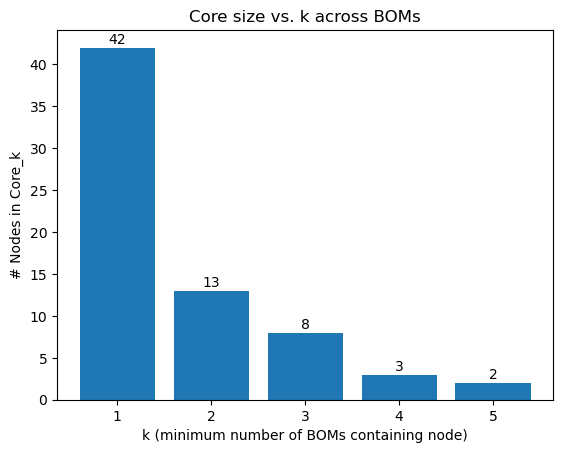

In [15]:
import matplotlib.pyplot as plt

# Suppose you already have core_counts = {k: count, ...}
core_counts = {5: 2, 4: 3, 3: 8, 2: 13, 1: 42}

ks = sorted(core_counts.keys(), reverse=True)
counts = [core_counts[k] for k in ks]

plt.bar(ks, counts)
plt.xlabel("k (minimum number of BOMs containing node)")
plt.ylabel("# Nodes in Core_k")
plt.title("Core size vs. k across BOMs")
plt.xticks(ks)
for i, val in enumerate(counts):
    plt.text(ks[i], val+0.5, str(val), ha='center')
plt.show()


In [17]:
import itertools
from collections import Counter

def canon(x):
    return str(x).strip().lower()

# Make each BOM a SET of canonicalized names
boms = [
    {canon(x) for x in jensen},
    {canon(x) for x in zee},
    {canon(x) for x in vlm},
    {canon(x) for x in optim},
    {canon(x) for x in sigfried},
    {canon(x) for x in gupta},
]
duet_counts = Counter()
triplet_counts = Counter()

for S in boms:                         # S is a set (no duplicates)
    for a, b in itertools.combinations(S, 2):
        print(a,b)
        duet_counts[frozenset((a, b))] += 1
    for a, b, c in itertools.combinations(S, 3):
        triplet_counts[frozenset((a, b, c))] += 1

# Sanity checks: no count should exceed number of BOMs
n = len(boms)
assert all(c <= n for c in duet_counts.values())
assert all(c <= n for c in triplet_counts.values())
print(duet_counts)
# Pretty-print top results (sorted tuple just for display)
def top_readable(counter, k=10):
    return [(" + ".join(sorted(list(key))), count) for key, count in counter.most_common(k)]

print("Top duets:", top_readable(duet_counts, 5))
print("Top triplets:", top_readable(triplet_counts, 20))



NameError: name 'jensen' is not defined

In [16]:
import itertools
from collections import Counter
import math

def canon(x): return str(x).strip().lower()

def prep_boms(raw_boms, alias=None):
    alias = alias or {}
    def norm(x): 
        x = canon(x)
        return canon(alias.get(x, x))
    return [set(norm(x) for x in bom) for bom in raw_boms]

def mine_pairs_triplets(boms, topk_pairs=20, topk_trips=20):
    n_routes = len(boms)
    # 1) single frequency (support)
    singles = Counter(x for S in boms for x in S)
    # 2) pairs & triplets
    pairs = Counter()
    trips = Counter()
    for S in boms:
        for a,b in itertools.combinations(sorted(S), 2):
            pairs[(a,b)] += 1
        for a,b,c in itertools.combinations(sorted(S), 3):
            trips[(a,b,c)] += 1

    # sanity
    assert all(c <= n_routes for c in pairs.values())
    assert all(c <= n_routes for c in trips.values())

    # 3) lift for pairs:  lift(a,b) = P(a,b) / (P(a)P(b))
    def support(cnt): return cnt / n_routes
    pair_stats = []
    for (a,b), c_ab in pairs.most_common():
        sa = support(singles[a]); sb = support(singles[b]); sab = support(c_ab)
        denom = (sa*sb) if sa*sb > 0 else float('nan')
        lift = sab/denom if denom else float('nan')
        pmi = math.log(sab/(sa*sb), 2) if denom and sab>0 else float('-inf')
        pair_stats.append({
            "a": a, "b": b, "count": c_ab,
            "support_ab": sab, "support_a": sa, "support_b": sb,
            "lift": lift, "PMI": pmi
        })

    # 4) simple “lift-like” score for triplets
    trip_stats = []
    for (a,b,c), c_abc in trips.most_common():
        sa, sb, sc = support(singles[a]), support(singles[b]), support(singles[c])
        sabc = support(c_abc)
        denom = sa*sb*sc if sa*sb*sc>0 else float('nan')
        lift3 = sabc/denom if denom else float('nan')
        trip_stats.append({
            "a": a, "b": b, "c": c, "count": c_abc,
            "support_abc": sabc, "lift3": lift3
        })

    # 5) sort by a robust score (e.g., lift then count)
    pair_stats.sort(key=lambda d: (d["lift"], d["count"]), reverse=True)
    trip_stats.sort(key=lambda d: (d["lift3"], d["count"]), reverse=True)

    return (
        singles, 
        pair_stats[:topk_pairs], 
        trip_stats[:topk_trips]
    )
